In [1]:
import numpy as np
import scipy as sp
from scipy.integrate import quad
from scipy.integrate import dblquad
import matplotlib.pyplot as plt
import sympy as smp
import plotly.graph_objects as go
from IPython.display import HTML

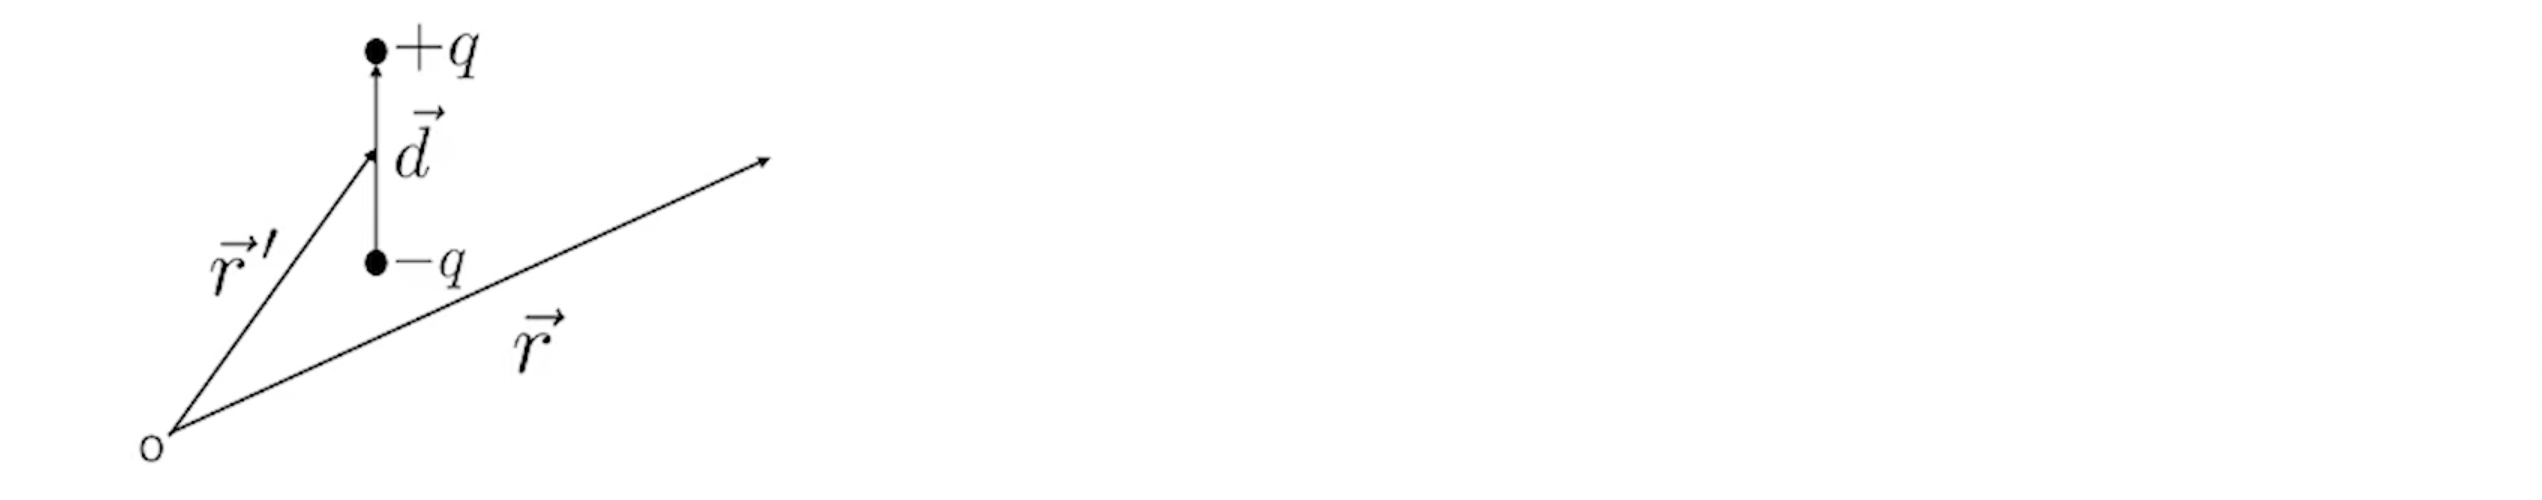

**__Firstly,Conside a dipole and trying to find the electric potential, and then we will jump on to the materials which contains multiple dipole units.__**
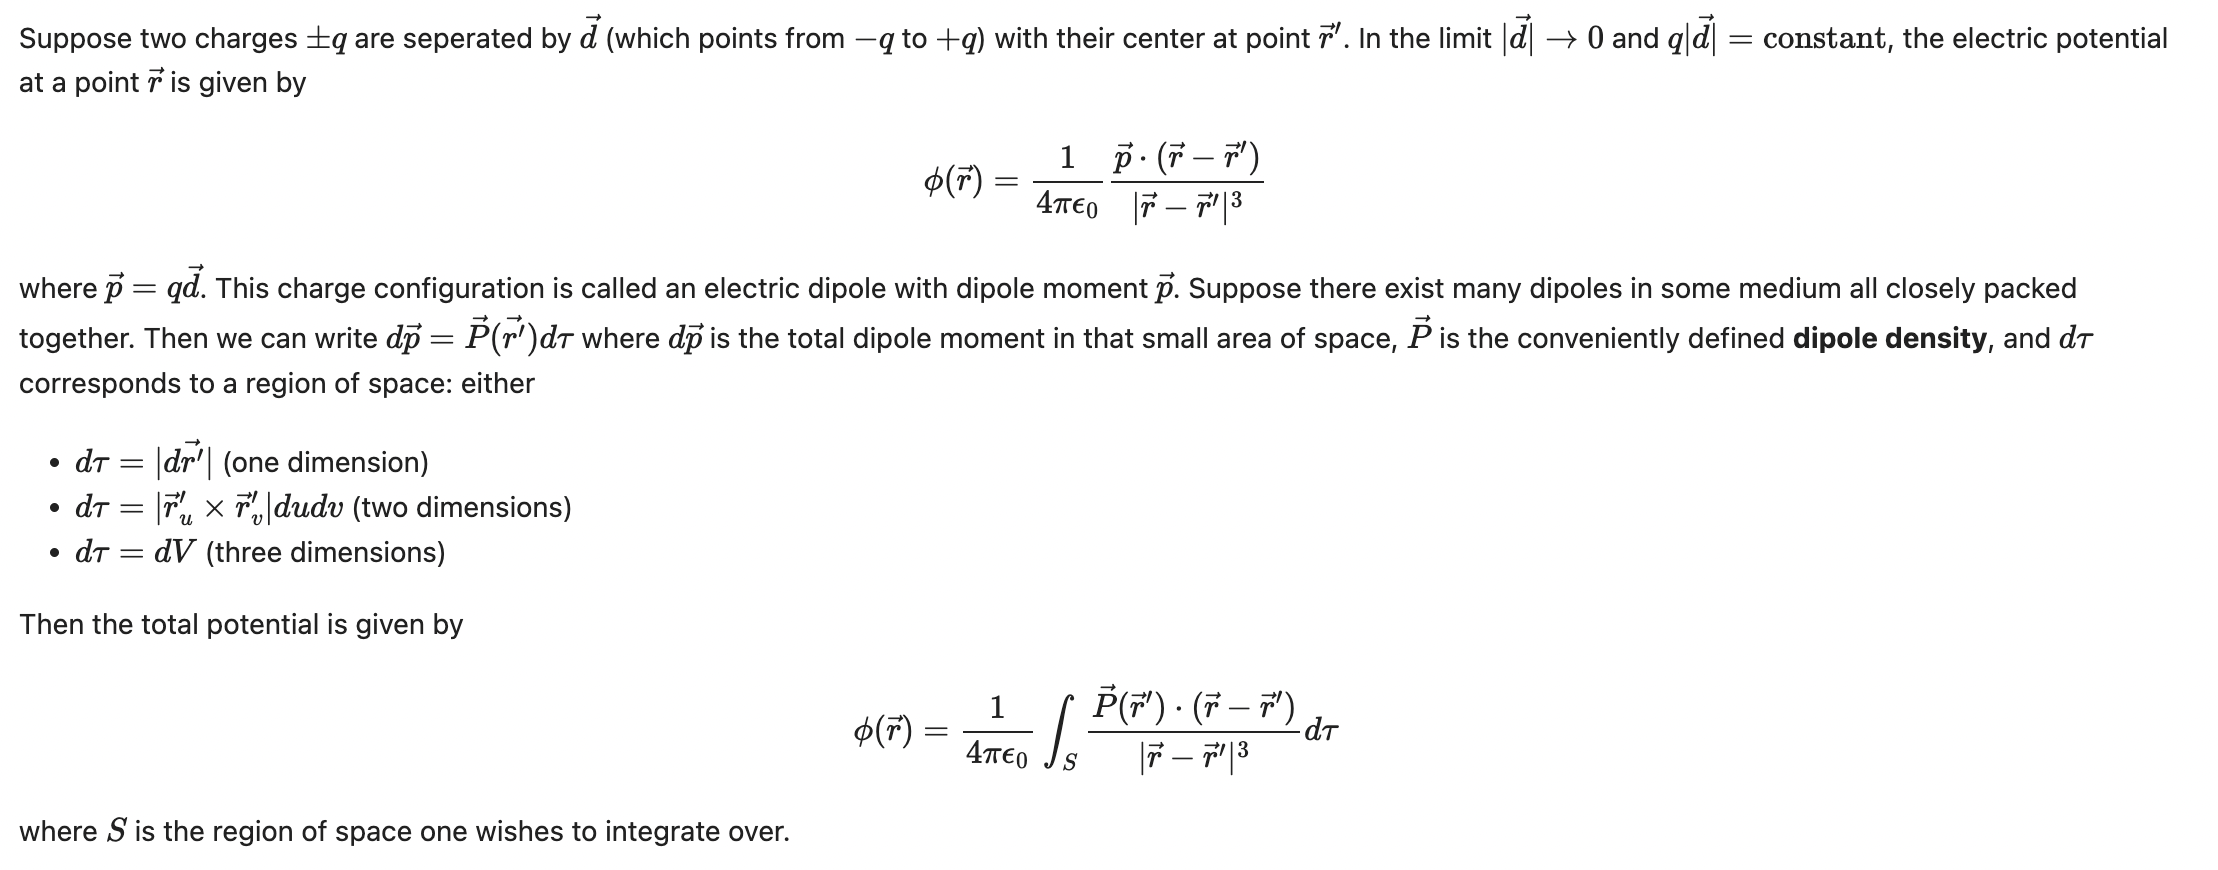

__Here, we are using density as it will be easier to consider effect of each dipole__

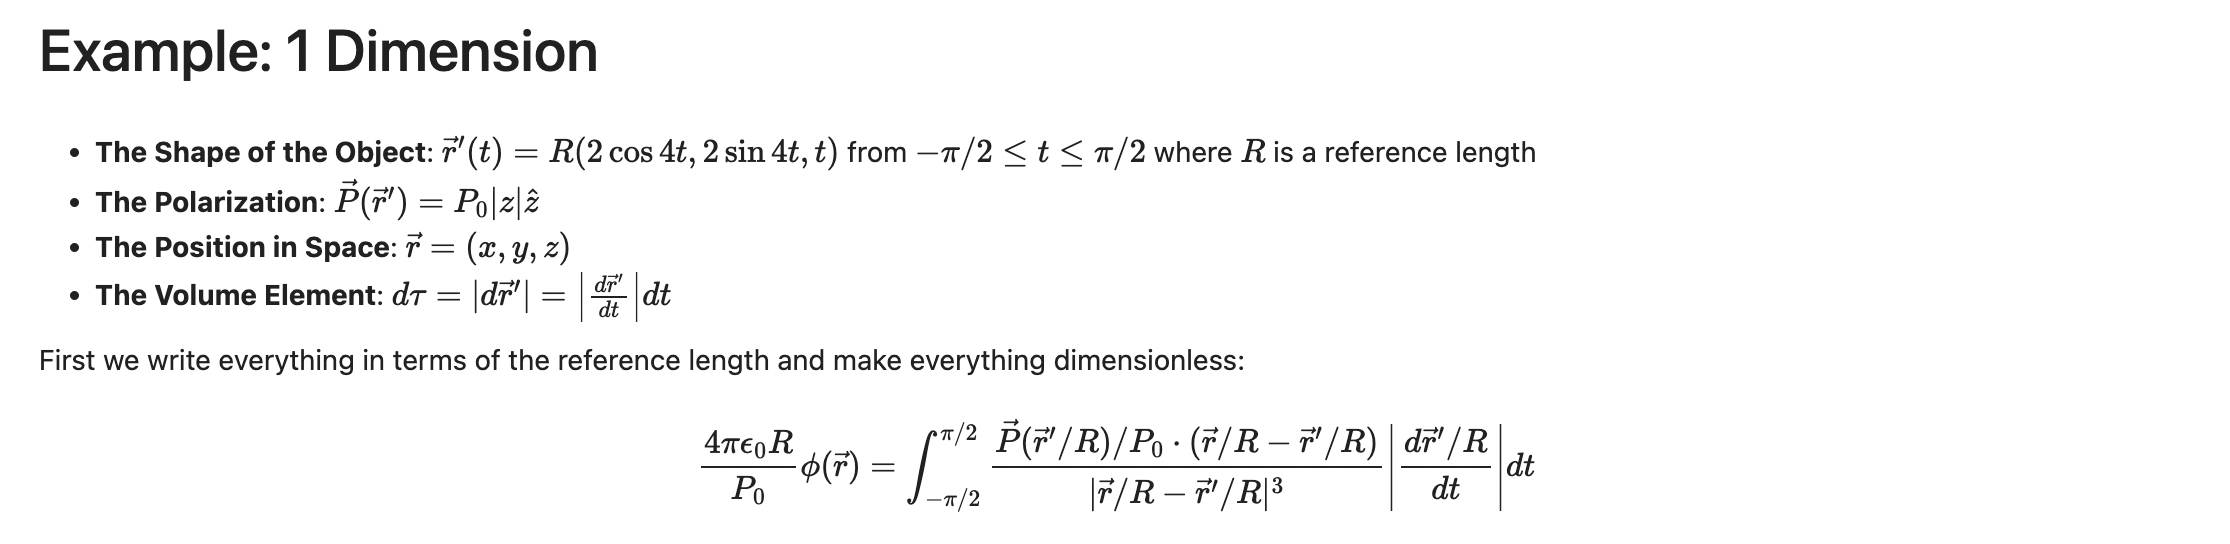

In [2]:
# Here, we are dealing with a helix shape which is growing in {z} direction.
t = smp.symbols('t', real=True)  # (t) stands for theta or angle
x, y, z = smp.symbols('x y z', real=True)   # position
xp, yp, zp = smp.symbols('x_p y_p z_p', cls=smp.Function) # functions for position (prime functions for x,y,z)
Px, Py, Pz = smp.symbols('P_x, P_y, P_z', cls=smp.Function)

In [3]:
zp # prime z

z_p

Define **x'**,**y'**,**z'** as function of one variable __t__:this represents a 1 dimensional curve

In [4]:
xp = xp(t)
yp = yp(t)
zp = zp(t)

In [5]:
xp # position of x in space 

x_p(t)

Let's define Polarization

In [6]:
Px = 0
Py = 0
Pz = smp.Abs(zp)

In [7]:
Pz  # the helix is moving in z direction with potental difference
# normalized polarization

Abs(z_p(t))

In [8]:
Px

0

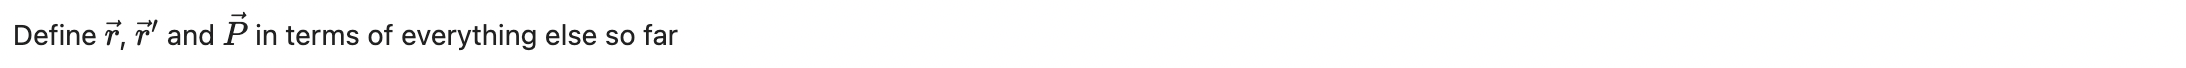

In [9]:
r = smp.Matrix([x, y, z]) # location in space
r_p = smp.Matrix([xp, yp, zp]) # r prime
P = smp.Matrix([Px, Py, Pz])
sep = r - r_p

In [10]:
r

Matrix([
[x],
[y],
[z]])

In [11]:
r_p # curve in space

Matrix([
[x_p(t)],
[y_p(t)],
[z_p(t)]])

In [12]:
P # polarzation

Matrix([
[          0],
[          0],
[Abs(z_p(t))]])

In [13]:
sep  # r - r(prime) {Seperation Vector }

Matrix([
[x - x_p(t)],
[y - y_p(t)],
[z - z_p(t)]])

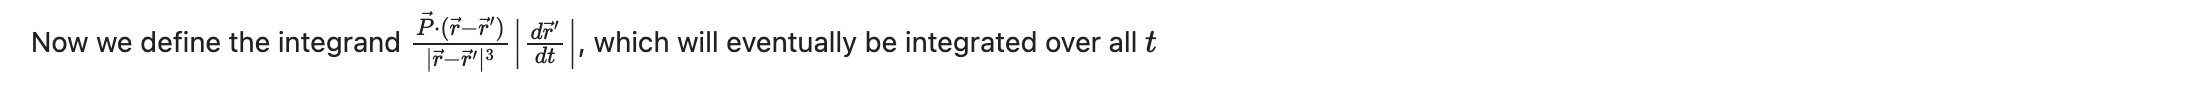

In [14]:
smp.diff(r_p,t)

Matrix([
[Derivative(x_p(t), t)],
[Derivative(y_p(t), t)],
[Derivative(z_p(t), t)]])

In [15]:
smp.diff(r_p,t).norm()

sqrt(Abs(Derivative(x_p(t), t))**2 + Abs(Derivative(y_p(t), t))**2 + Abs(Derivative(z_p(t), t))**2)

In [16]:
integrant = P.dot(sep)/sep.norm()**3 * smp.diff(r_p,t).norm()
integrant

# norm = modulus value ; .dot is the dot product

(z - z_p(t))*sqrt(Abs(Derivative(x_p(t), t))**2 + Abs(Derivative(y_p(t), t))**2 + Abs(Derivative(z_p(t), t))**2)*Abs(z_p(t))/(Abs(x - x_p(t))**2 + Abs(y - y_p(t))**2 + Abs(z - z_p(t))**2)**(3/2)

__As we just want it to be__

In [17]:
# Now as i want to integrate in t for the given curve, let us subtritute the given values in above

integrant = integrant.subs([(xp, 2* smp.cos(4*t)),
                           (yp, 2* smp.sin(4*t)),
                           (zp, t)]) . simplify()
integrant

-sqrt(65)*(t - z)*Abs(t)/((t - z)**2 + (x - 2*cos(4*t))**2 + (y - 2*sin(4*t))**2)**(3/2)

__Lets make it a numerical function__ in which i could substritute some numerical values


In [18]:
integrant_f = smp.lambdify([t,x,y,z],integrant) # Here, we have four variable 

In [19]:
integrant_f(8,1,3,5)

-4.106317620757444

In [20]:
# now we have to define a phi function, so we have to integrate it over t with its limits{Definate integartion}
def Phi(x, y, z):
    return quad(integrant_f, -np.pi/2, np.pi/2, args=(x, y, z))[0]

Find the potential over a given 2D area

In [21]:
x = np.linspace(-10,10 , 50)
y = np.linspace(-10, 10, 50)
xv, yv = np.meshgrid(x, y)
phi = np.vectorize(Phi)(xv, yv, 10)

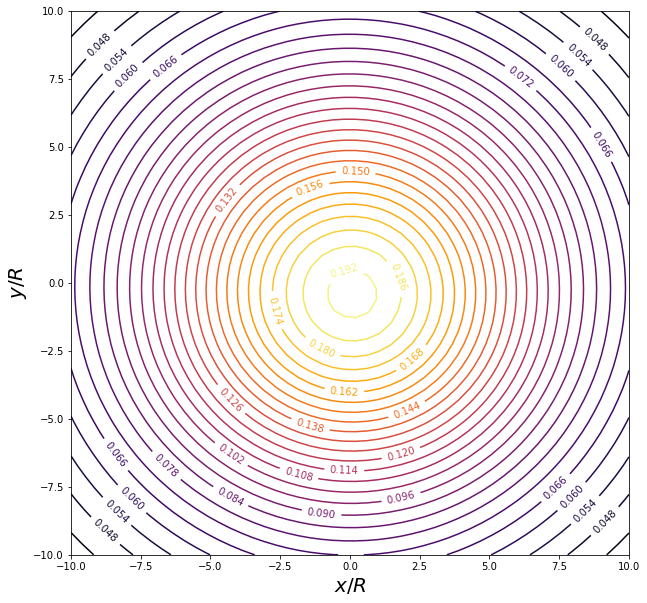

In [22]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
cs = plt.contour(xv,yv,phi, levels=25, cmap='inferno')
plt.clabel(cs, fontsize=10)
plt.xlabel('$x/R$', fontsize=20)
plt.ylabel('$y/R$', fontsize=20)
plt.show()

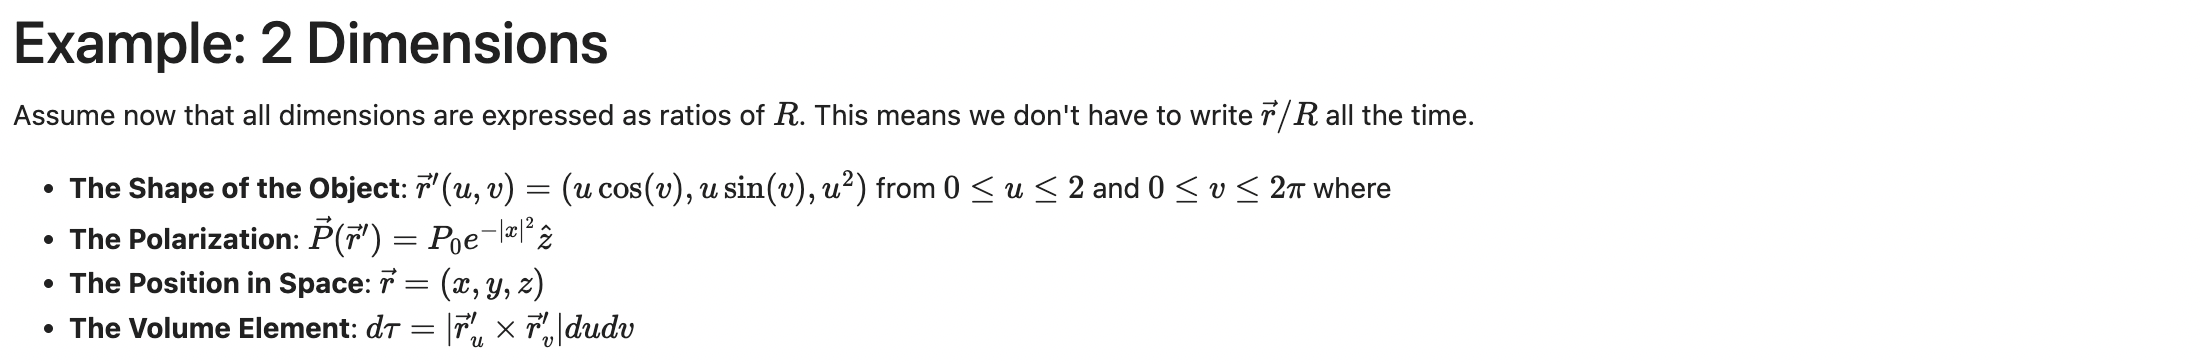
__Surface__ of a __Parabolla__

Doing the same as we have done before

In [23]:
u,v = smp.symbols('u v', real=True)
x, y, z = smp.symbols('x y z', real=True)
xp, yp, zp = smp.symbols('x_p y_p z_p', cls=smp.Function)
Px, Py, Pz = smp.symbols('P_x, P_y, P_z', cls=smp.Function)

Defining Primes

In [24]:
xp = xp(u,v)
yp = yp(u,v)
zp = zp(u,v)

In [25]:
# Define Polarization
Px = 0
Py = 0
Pz = smp.exp(-xp**2)

In [26]:
r = smp.Matrix([x, y, z])
r_p = smp.Matrix([xp, yp, zp])
P = smp.Matrix([Px, Py, Pz])
sep = r - r_p

In [27]:
sep # position of a Surface

Matrix([
[x - x_p(u, v)],
[y - y_p(u, v)],
[z - z_p(u, v)]])

In [28]:
r

Matrix([
[x],
[y],
[z]])

In [29]:
r_p

Matrix([
[x_p(u, v)],
[y_p(u, v)],
[z_p(u, v)]])

In [30]:
P

Matrix([
[                 0],
[                 0],
[exp(-x_p(u, v)**2)]])

In [31]:
smp.diff(r_p, v)

Matrix([
[Derivative(x_p(u, v), v)],
[Derivative(y_p(u, v), v)],
[Derivative(z_p(u, v), v)]])

In [32]:
smp.diff(r_p, u)

Matrix([
[Derivative(x_p(u, v), u)],
[Derivative(y_p(u, v), u)],
[Derivative(z_p(u, v), u)]])

In [33]:
dTau = (smp.diff(r_p, u).cross(smp.diff(r_p, v))).norm()
integrant = P.dot(sep)/sep.norm()**3 * dTau
integrant
# defing Tau
# using the same formulae as have at the first place

(z - z_p(u, v))*sqrt(Abs(Derivative(x_p(u, v), u)*Derivative(y_p(u, v), v) - Derivative(x_p(u, v), v)*Derivative(y_p(u, v), u))**2 + Abs(Derivative(x_p(u, v), u)*Derivative(z_p(u, v), v) - Derivative(x_p(u, v), v)*Derivative(z_p(u, v), u))**2 + Abs(Derivative(y_p(u, v), u)*Derivative(z_p(u, v), v) - Derivative(y_p(u, v), v)*Derivative(z_p(u, v), u))**2)*exp(-x_p(u, v)**2)/(Abs(x - x_p(u, v))**2 + Abs(y - y_p(u, v))**2 + Abs(z - z_p(u, v))**2)**(3/2)

In [34]:
# lets substritute
integrant = integrant.subs([(xp, u*smp.cos(v)),
                            (yp, u*smp.sin(v)),
                            (zp, u**2)]).simplify()
integrant

(-u**2 + z)*sqrt(4*u**2 + 1)*exp(-u**2*cos(v)**2)*Abs(u)/((u**2 - z)**2 + (-u*sin(v) + y)**2 + (-u*cos(v) + x)**2)**(3/2)

Create a numerical function that takes in 5 arguments. __u__ and __v__  specify a unique point on our surface and __x,y,z__ specify a point where we're measuring the electric field. We integrate over the surface by integrating over __u__  and __v__



In [35]:
# let convert it into Numerical functio, Again!!
integrant_f = smp.lambdify([u,v,x,y,z], integrant)

In [36]:
def Phi(x, y, z):
    return dblquad(integrant_f, 0, 2*np.pi, lambda x: 0, lambda x: 2, args=(x, y, z))[0]

In [39]:
# let's Get the electric potential at various points in space
x = np.linspace(-0.5,0.5, 30)
y = np.linspace(-0.5,0.5, 30)
xv, yv = np.meshgrid(x, y)
phi = np.vectorize(Phi)(xv, yv, 2)

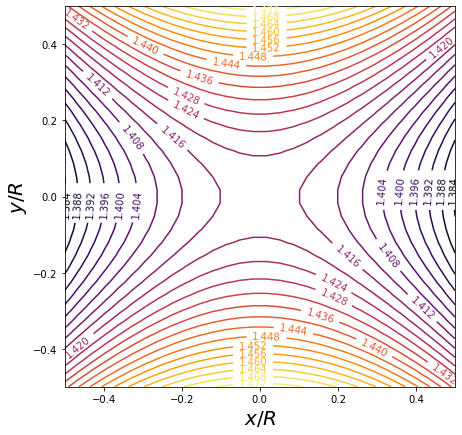

In [40]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
cs = plt.contour(xv,yv,phi, levels=25, cmap='inferno')
plt.clabel(cs, fontsize=10)
plt.xlabel('$x/R$', fontsize=20)
plt.ylabel('$y/R$', fontsize=20)
plt.show()